<a href="https://colab.research.google.com/github/Khushi-MA/cat-dog-classifier/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import the files

input = '/content/drive/My Drive/practice-reu/cat-dog-classifier-dataset/input.csv'
input_test = '/content/drive/MyDrive/practice-reu/cat-dog-classifier-dataset/input_test.csv'
labels = '/content/drive/MyDrive/practice-reu/cat-dog-classifier-dataset/labels.csv'
labels_test = '/content/drive/MyDrive/practice-reu/cat-dog-classifier-dataset/labels_test.csv'

X_train = np.loadtxt(input, delimiter = ',')
Y_train = np.loadtxt(labels, delimiter = ',')

X_test = np.loadtxt(input_test, delimiter = ',')
Y_test = np.loadtxt(labels_test, delimiter = ',')

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)

Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255
X_test = X_test/255

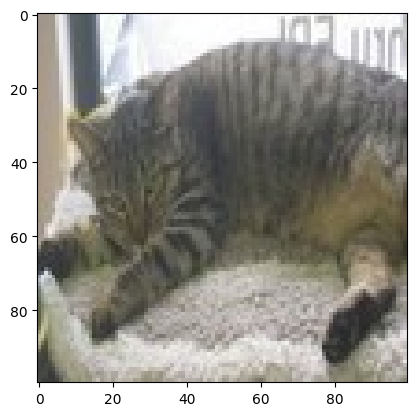

In [6]:
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [7]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size =  (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data = (X_test, Y_test))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.5266 - loss: 0.9224 - val_accuracy: 0.5825 - val_loss: 0.6818
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5946 - loss: 0.6635 - val_accuracy: 0.6300 - val_loss: 0.6531
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6992 - loss: 0.5653 - val_accuracy: 0.6375 - val_loss: 0.6396
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7712 - loss: 0.4754 - val_accuracy: 0.6225 - val_loss: 0.7323
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8054 - loss: 0.4056 - val_accuracy: 0.6000 - val_loss: 0.8269
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8751 - loss: 0.2932 - val_accuracy: 0.6350 - val_loss: 0.8889
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9305 - loss: 0.1849 - val_accuracy: 0.6125 - val_loss: 1.0931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9334 - loss: 0.1749 - val_accuracy: 0.6250 - v

In [11]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6325 - loss: 1.8575 


[1.6132392883300781, 0.6474999785423279]

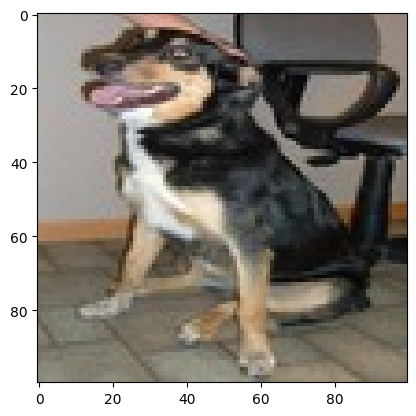

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
Cat


In [12]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2])
plt.show()
y_pred = model.predict(X_test[idx2,:].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    print("Dog")
else:
    print("Cat")

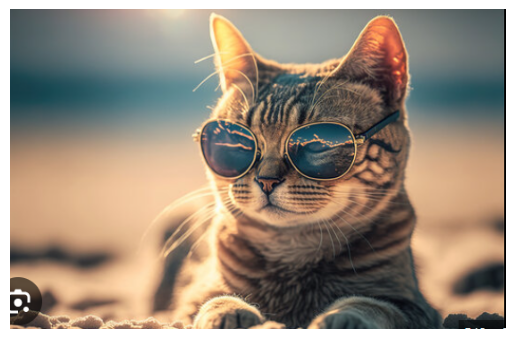

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Dog


In [27]:
from PIL import Image

# newpath = 'path to file in drive or local - img.png'

# Load and display the image using PIL
img = Image.open(newpath)
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize the image to match the input shape of the model (e.g., 100x100 pixels)
img = img.resize((100, 100))

# Convert the image to RGB format
img = img.convert('RGB')

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image array to have values between 0 and 1
img_array = img_array / 255.0

# Add a batch dimension to the image array
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 100, 100, 3)

# Load the pre-trained model
# model = load_model('path_to_your_trained_model.h5')

# Predict the class of the image
y_pred = model.predict(img_array)

# Convert the prediction to a binary label
y_pred = y_pred > 0.5

# Interpret the prediction
if y_pred[0][0] == 0:
    print("Dog")
else:
    print("Cat")
